In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [117]:
df = pd.read_csv("data.csv")

In [118]:
df

,NUM,NAME,COUNTRY,Mine Annual Production (Million Tonne),Stripping Ratio,Mill Annual Production (Thousand Tonne),Reserve Mean Grade % Cu EQU.,LOM,CAPEX US$ millions
0,1,Luita (Sulphide) Expansion,DR Congo,3,3.80,233,2.84,18,442
1,2,Lumwana Expansion,Zambia,20,3.50,238,0.56,20,509
2,3,Aktogay (Concs),Kazakhstan,25,0.24,372,0.42,50,1983
3,4,Aynak,Afghanistan,22,3.00,1103,1.71,30,5628
4,5,Qulong,China,33,1.31,481,0.43,31,1826
5,6,Tampakan,Philippines,73,0.75,1250,0.61,33,5913
6,7,Xietongmen-Xiongcun,China,14,2.12,230,0.50,13,941
7,8,Frieda River,Papua New Guinea,30,0.70,400,0.49,20,1606
8,9,Yandera,Papua New Guinea,25,3.00,275,0.36,20,1806
9,10,Ak-Sug,Russia,24,1.20,370,0.49,25,1844


In [119]:
del df["NAME"]
del df["COUNTRY"]

In [120]:
target_column = 'CAPEX US$ millions'

In [121]:
X = df.drop([target_column, 'NUM'], axis =1)
y = df[target_column]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [124]:
X_test_scaled

array([[ 0.77430941, -0.67458771,  0.09156176, -0.61062171,  0.78664759],
       [-0.11061563,  0.62724822, -0.02234543, -0.25956742,  2.02280809],
       [-0.82961722, -0.05621564, -0.87964691, -0.58721809, -0.80270162],
       [ 0.11061563,  0.34518377, -0.43301083, -0.58721809, -0.80270162],
       [-1.38269537,  1.85314371, -0.8736518 ,  0.46594479, -0.09632419],
       [ 1.99108134, -0.94580352,  2.2258228 ,  0.06808326,  1.31643066],
       [ 0.55307815,  0.41027556, -0.39704013, -0.75104343, -0.80270162],
       [ 0.77430941, -1.26041387, -0.11526972, -0.54041085, -0.97929598],
       [-0.82961722,  1.49513883,  1.78518183,  2.64248142,  0.78664759],
       [-1.43800319, -0.67458771, -0.68480567,  1.02763166, -0.80270162],
       [ 0.3871547 , -1.11938165, -0.6967959 , -0.86806153, -0.62610727]])

In [125]:
df.isnull().sum()

NUM                                        0
Mine Annual Production (Million Tonne)     0
Stripping Ratio                            0
Mill Annual Production (Thousand Tonne)    0
Reserve Mean Grade % Cu EQU.               0
LOM                                        0
CAPEX US$ millions                         0
dtype: int64

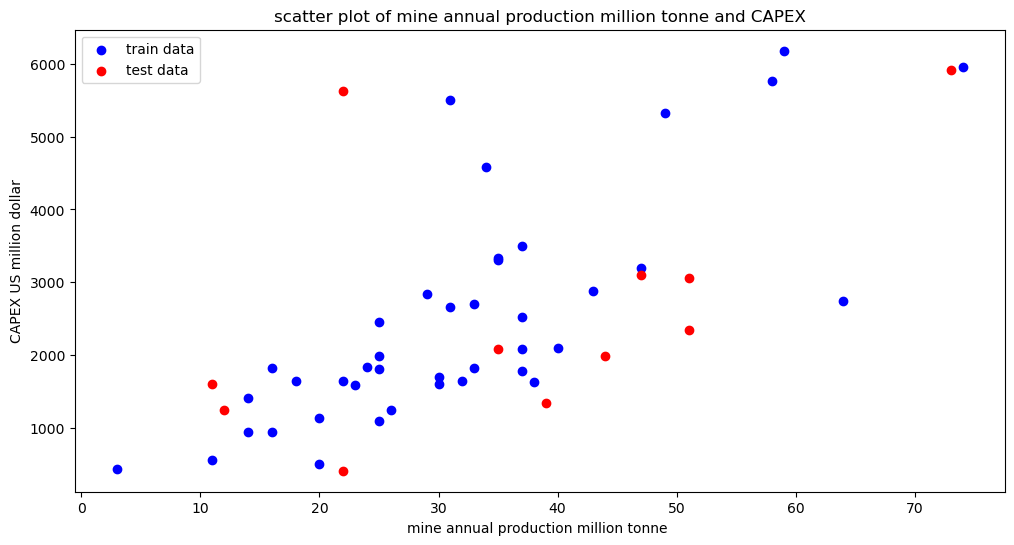

In [126]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train['Mine Annual Production (Million Tonne)'], y_train, color ='blue', label = 'train data')
plt.scatter(X_test['Mine Annual Production (Million Tonne)'], y_test, color='red', label ='test data')

plt.xlabel('mine annual production million tonne ')
plt.ylabel('CAPEX US million dollar')
plt.title('scatter plot of mine annual production million tonne and CAPEX')
plt.legend()
plt.show()

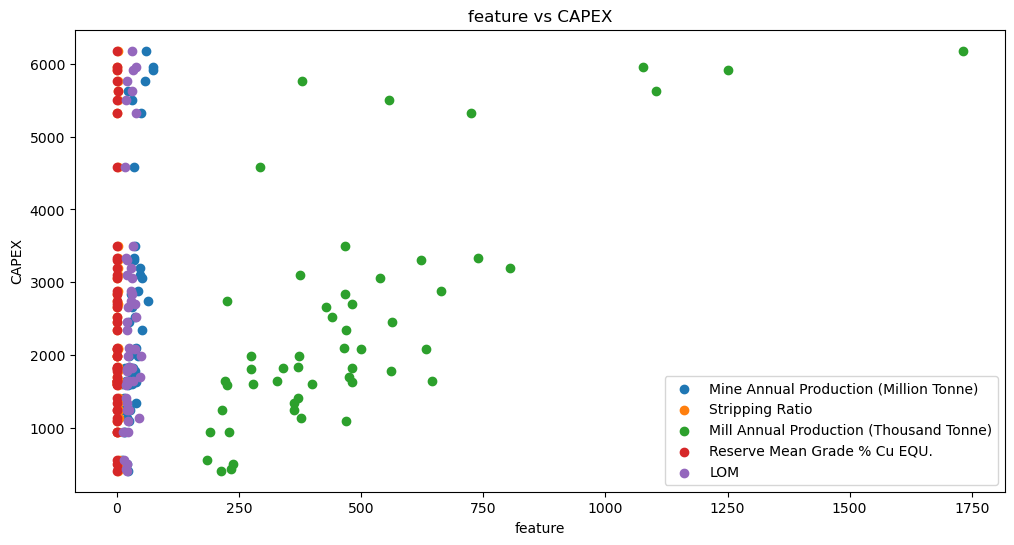

In [127]:
plt.figure(figsize=(12, 6))

for feature in X:
    plt.scatter(X[feature],y, label= feature )
plt.xlabel('feature')
plt.ylabel('CAPEX')
plt.title('feature vs CAPEX')
plt.legend()
plt.show()

In [128]:
from sklearn.model_selection import ShuffleSplit, KFold
random_splits = ShuffleSplit(n_splits=40, test_size=0.2)

k_fold = KFold(n_splits=6, shuffle= True, random_state=42)

# GridSearchCV

In [155]:
c_range = np.logspace(-3, 2, 6)
gamma_range = np.logspace(-3, 2, 6)
epsilon_range = np.logspace(-3, 2, 6)

#[0.0001,0.001, 0.01, 0.1, 1, 10, 100]
#[1, 0.1, 0.001, 0.001, 0.0001]

In [156]:

#linear regression model
svr_linear = SVR(kernel ='linear')
param_grid =[{
    'C': c_range,
    'epsilon': epsilon_range
}]
grid_search = GridSearchCV(svr_linear, param_grid, cv= k_fold)
grid_search.fit(X_train_scaled,y_train)
svr_linear = grid_search.best_estimator_

svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)

y_pred_litrain = svr_linear.predict(X_train_scaled)


#rbf regression model
svr_rbf = SVR(kernel = 'rbf')
param_grid = [{
    'C': c_range,
    'gamma': gamma_range}]
grid_search = GridSearchCV(svr_rbf, param_grid, cv = k_fold)
grid_search.fit(X_train_scaled, y_train)
svr_rbf =grid_search.best_estimator_

svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

y_pred_rbftrain = svr_rbf.predict(X_train_scaled)

#poly regression model
svr_poly = SVR(kernel='poly', degree=4)
param_grid = [{
    'C': c_range,
    'gamma': gamma_range
}]
grid_search = GridSearchCV(svr_poly, param_grid, cv=k_fold)
grid_search.fit(X_train_scaled, y_train)
svr_poly = grid_search.best_estimator_

svr_poly.fit(X_train_scaled, y_train)
y_pred_poly = svr_poly.predict(X_test_scaled)

y_pred_polytrain = svr_poly.predict(X_train_scaled)

In [157]:
svr_poly

SVR(degree=4, gamma=1.0, kernel='poly')

In [158]:

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
r2_linear_train = r2_score(y_train, y_pred_litrain)
mae_linear = mean_absolute_error(y_test,y_pred_linear)


rmse_rbf = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_rbf = r2_score(y_test, y_pred_rbf)
r2_rbf_train = r2_score(y_train, y_pred_rbftrain)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
r2_poly_train = r2_score(y_train, y_pred_polytrain)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(" svr with linear kernel:")
print("root mean squared error(RMSE):", rmse_linear)
print("R-squared score: ", r2_linear)
print("R-squared score in train: ", r2_linear_train)
print("Mean Absolute error: ", mae_linear)


print("\n svr with rbf kernel:")
print("root mean squared error(RMSE):", rmse_rbf)
print("R-squared score: ", r2_rbf)
print("R-squared score in train : ", r2_rbf_train)
print("Mean Absolute error: ", mae_rbf)

print("\n svr with poly kernel:")
print("root mean squared error(RMSE):", rmse_poly)
print("R-squared score: ", r2_poly)
print("R-squared score in train : ", r2_poly_train)
print("Mean Absolute error: ", mae_poly)

 svr with linear kernel:
root mean squared error(RMSE): 985.1062255239877
R-squared score:  0.6496338859655538
R-squared score in train:  0.5891616889893778
Mean Absolute error:  694.3010337750562

 svr with rbf kernel:
root mean squared error(RMSE): 1662.2911518759934
R-squared score:  0.00236849544074047
R-squared score in train :  0.050141709405182366
Mean Absolute error:  1086.204446293584

 svr with poly kernel:
root mean squared error(RMSE): 1413.4999395245954
R-squared score:  0.278647473025467
R-squared score in train :  0.41844527737379
Mean Absolute error:  1061.8428129256324


In [159]:
comparation = pd.DataFrame({
    'Real value': y_test, 'Predict value': y_pred_linear
})
comparation

,Real value,Predict value
19,3059,2777.373511
41,2078,2445.848395
47,414,1321.140043
12,1350,2105.328277
43,1252,1210.912646
5,5913,4688.622763
17,3096,2363.511224
50,2348,2474.011118
3,5628,3050.317193
32,1600,992.709090


# randomSearch

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist ={
    'kernel': ['linear', 'poly', 'rbf'],
    'C': uniform(0.001, 1000),
    'gamma': uniform(0.001, 1),
    'epsilon': uniform(0.01, 1.0)
}

svr = SVR()
random_search = RandomizedSearchCV(svr, param_distributions= param_dist, n_iter= 100, cv = k_fold, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

best_svr_randomsearch = random_search.best_estimator_

y_pred_ran = best_svr_randomsearch.predict(X_test_scaled)
y_pred_train = best_svr_randomsearch.predict(X_train_scaled)


In [143]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ran))
r2 = r2_score(y_test, y_pred_ran)
r2_train = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred_ran)

print("root mean square error; ", rmse)
print("r2 score:", r2)
print("r2 score in train :", r2_train)
print("mean absolute error: ", mae)
print ("best parameter:", best_svr_randomsearch)

root mean square error;  970.2153202311457
r2 score: 0.660146125694986
r2 score in train : 0.5910623415693609
mean absolute error:  690.8728815627563
best parameter: SVR(C=254.16464906973877, epsilon=0.30529058841893875, gamma=0.3235507642386005,
    kernel='linear')


# bayessian optimisation


In [132]:
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

param_space = {
    'kernel':['rbf', 'linear', 'poly'],
    'C': Real(1e-3, 1e3, prior='log-uniform'),
    'epsilon': Real(1e-3, 1e1, prior='log-uniform'),
    'gamma': Real(1e-3, 1e1, prior='log-uniform')
}

bayes_search = BayesSearchCV(svr, param_space, n_iter=30, cv= k_fold, random_state=42)
bayes_search.fit(X_train_scaled,y_train)

best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

best_svr = SVR(**best_params)
best_svr.fit(X_train_scaled, y_train)
y_pred = best_svr.predict(X_test_scaled)
y_predtrain = best_svr.predict(X_train_scaled)


In [133]:
best_svr

SVR(C=1000.0, epsilon=0.044755430744407715, gamma=1.2844533040053419,
    kernel='linear')

In [134]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_predtrain)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)
print("R-squared Score in train set:", r2_train)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 978087.5810112045
Root Mean Squared Error (RMSE): 988.9831045125111
R-squared Score: 0.6468707324415818
R-squared Score in train set: 0.6191893528264356
Mean Absolute Error (MAE): 703.0782403650355


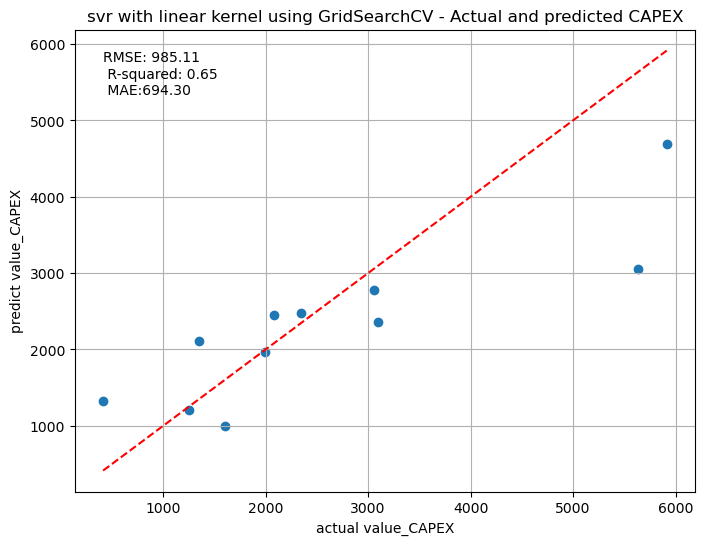

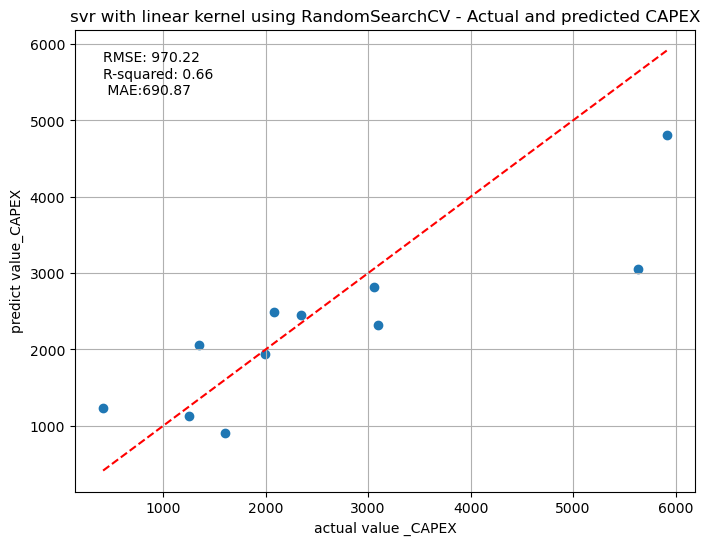

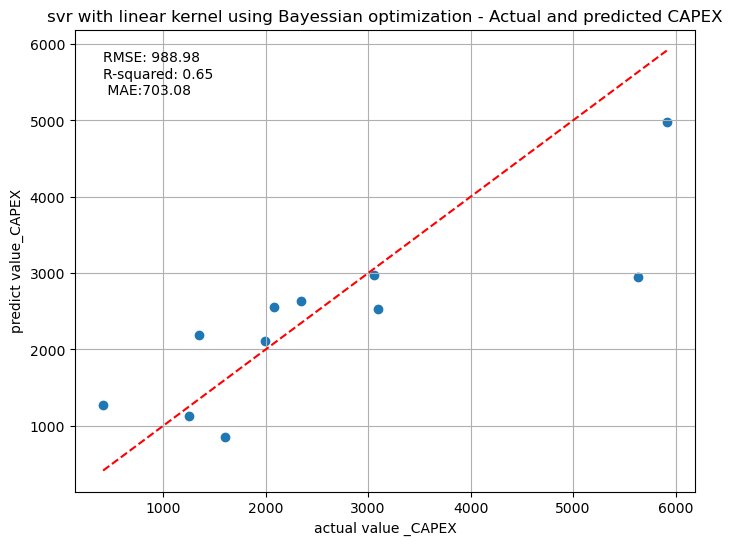

In [171]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('actual value_CAPEX')
plt.ylabel('predict value_CAPEX')
plt.title('svr with linear kernel using GridSearchCV - Actual and predicted CAPEX')
plt.text(min(y_test), max(y_test), f'RMSE: {rmse_linear:.2f} \n R-squared: {r2_linear:.2f} \n MAE:{mae_linear:.2f}', verticalalignment='top')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ran)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('actual value _CAPEX')
plt.ylabel('predict value_CAPEX')
plt.title('svr with linear kernel using RandomSearchCV - Actual and predicted CAPEX')
plt.text(min(y_test), max(y_test), f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ran)):.2f}\nR-squared: {r2_score(y_test, y_pred_ran):.2f} \n MAE:{mean_absolute_error(y_test, y_pred_ran):.2f}', verticalalignment='top')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('actual value _CAPEX')
plt.ylabel('predict value_CAPEX')
plt.title('svr with linear kernel using Bayessian optimization - Actual and predicted CAPEX')
plt.text(min(y_test), max(y_test), f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\nR-squared: {r2_score(y_test, y_pred):.2f} \n MAE:{mean_absolute_error(y_test, y_pred):.2f}', verticalalignment='top')
plt.grid(True)
plt.show()
